загруаем необходимые модули для работы

In [3]:
import pandas as pd
import numpy as np


открываем файлы тестовый и трейновых данных

In [4]:
test_df = pd.read_csv('TestDataFlight.csv')
train_df = pd.read_csv('TrainDataFlight.csv')

In [5]:
train_df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Cypselurus,35.0,38.5,44.1,18.0369,6.3063,920.0
1,Hirundichthys,10.0,10.5,11.6,1.9720,1.1600,7.5
2,Cypselurus,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Exocoetus,24.0,26.0,29.2,8.8768,4.4968,290.0
4,Parexocoetus,18.4,20.0,22.4,8.8928,3.2928,150.0


удаляем категориальные переменые, а Widht - масса нашего таргета

In [8]:
X = train_df.drop(['Weight','Species'], axis = 1)
y = train_df['Weight']



In [9]:
X.head()

,Length1,Length2,Length3,Height,Width
0,35.0,38.5,44.1,18.0369,6.3063
1,10.0,10.5,11.6,1.9720,1.1600
2,23.9,26.5,31.1,12.3778,4.6961
3,24.0,26.0,29.2,8.8768,4.4968
4,18.4,20.0,22.4,8.8928,3.2928


In [12]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score   
from sklearn.linear_model import LinearRegression

Разделяем данные на тестовые и тренировочные

Создаем модель и обучаем ее

In [15]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Получение коэффициентов и свободного члена

In [18]:
coeff = model.coef_
intercept = model.intercept_
print(coeff)
print(intercept)

[ 29.58497695  36.75425629 -38.52816785  29.69302546  10.6746333 ]
-536.2974072887055


полуаем имена признаков


In [20]:
feature_name = X.columns

создаем словарь для соответствия коэффициетов и признаков

In [21]:
coef_dict = dict(zip(feature_name, coeff))
print('Коэффициенты по признакам')
for feature, coef in coef_dict.items():
    print(f'{feature} : {coef}')

Коэффициенты по признакам
Length1 : 29.584976946363675
Length2 : 36.75425628912391
Length3 : -38.52816784818683
Height : 29.69302545575465
Width : 10.674633295587029


Выбор признака дял визуализации ( Width )

In [23]:
feature_to_plot = 'Width'
X_single = X[feature_to_plot].values.reshape(-1,1)

созадние массива с фиксированным значение для остальных признаков (среднее значение)

In [24]:
X_fixed = np.mean(X.drop(columns=[feature_to_plot]), axis=0).values.reshape(1, -1)

предсказание для всех значение выбраноо признака 

In [25]:
y_pred = model.predict(np.hstack((X_single, np.tile(X_fixed, (X_single.shape[0], 1)))))

c:\Users\grimm\Documents\Stronghold_of_Digital_Martyrdom\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Визуализация

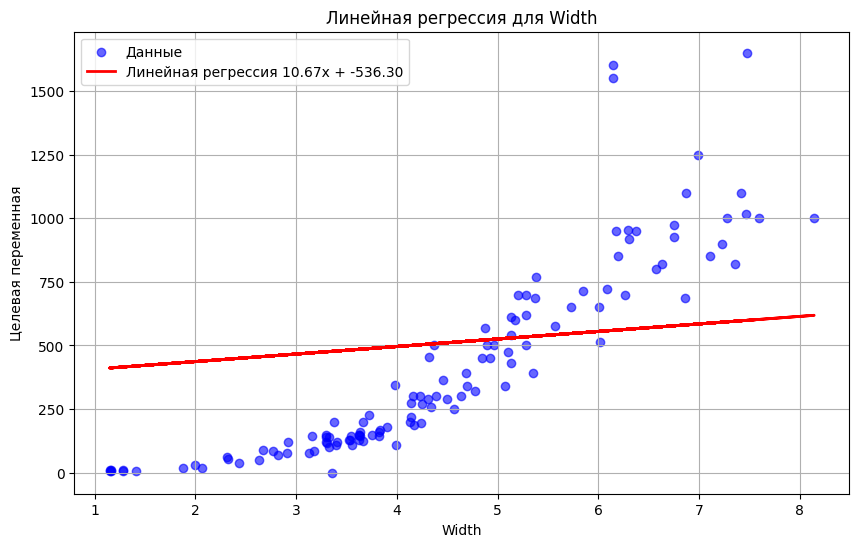

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[feature_to_plot], y, color='blue', label='Данные', alpha=0.6)  # Исходные данные
plt.plot(X[feature_to_plot], y_pred, color='red', linewidth=2, label=f'Линейная регрессия {coef:.2f}x + {intercept:.2f}')
plt.title(f'Линейная регрессия для {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Целевая переменная')
plt.legend()
plt.grid()
plt.show()

Оцениваем модель

In [ ]:
mse = mean_squared_error(y,y_pred)
r2 =r2_score(y,y_pred)
print(f'Среднеквадратичная ошибка {mse:.2f}')
print(f'r2 {r2:.2f}')


Создаем предсказание для тестовой модели


In [44]:
X_test = test_df.drop(['Species'], axis = 1)

test_pred = model.predict(X_test)

In [70]:
test_df['Predict'] = test_pred

In [71]:
test_df.head()

,Species,Length1,Length2,Length3,Height,Width,Predict
0,Hirundichthys,9.3,9.8,10.8,1.7388,1.0476,-254.256644
1,Fodiater,34.8,37.3,39.8,6.2884,4.0198,560.403982
2,Parexocoetus,19.0,20.7,23.2,9.3960,3.4104,208.177202
3,Cheilopogon,34.6,37.0,39.3,10.5717,6.3666,714.960159
4,Exocoetus,21.1,22.5,25.0,6.4000,3.8000,182.311146
